In [35]:
from sklearn.model_selection import learning_curve
from sklearn import linear_model
from sklearn.datasets import load_digits
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as seabornInstance 
from sklearn import preprocessing
from scipy.special import expit
from sklearn import metrics
import matplotlib.pyplot as plt
import scikitplot as skplt
import pandas as pd
import numpy as np

In [2]:
# Loading in data
data = pd.read_csv("inputsong3.csv")

# Delete non-number columns
data = data.drop(['Artist'], axis=1)
data = data.drop(['Album'], axis=1)
data = data.drop(['Track ID'], axis=1)
data = data.drop(['Track'], axis=1)

In [3]:
# Mapping Keys to numbers
key_di = {0: "C",0: "B#", 1: "C#", 2: "D", 3: "D#", 4: "E", 5: "F", 5: "E#", 6: "F#", 
          7: "G", 8: "G#", 9: "A", 10: "A#", 11: "B"}
data.replace({"Key": key_di})
data = data.drop(['Key'], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Release Date,Popularity,Danceability,Energy,Key Val,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,2008,30,0.197,0.973,4,-3.261,0,0.1310,0.000663,0.000356,0.5380,0.0383,111.206,4
1,1975,13,0.874,0.840,0,-11.199,1,0.0512,0.668000,0.004470,0.2230,0.9660,134.844,4
2,2003,0,0.660,0.597,9,-5.447,0,0.0302,0.306000,0.000112,0.7810,0.3130,131.979,4
3,1984,12,0.639,0.541,5,-13.679,1,0.0653,0.777000,0.800000,0.0726,0.5750,128.981,4
4,1983,18,0.724,0.351,9,-15.556,0,0.0500,0.311000,0.000032,0.5990,0.4320,109.633,4


In [4]:
# Split training, testing, validation data by 80%, 10%, 10%
train_data,test_data = np.split(data.sample(frac=1), [int(.8*len(data))])

In [5]:
# Split output and convert to array
train_output = train_data.Popularity
train_output = np.asarray(train_output,dtype=np.float64)
train_output_norm = train_data.Popularity
train_output_norm = np.asarray(train_output_norm,dtype=np.float64)
train_data = train_data.drop(['Popularity'], axis=1)
train_data_norm = train_data
train_data = np.asarray(train_data,dtype=np.float64)
train_data_norm = np.asarray(train_data,dtype=np.float64)
training_count = len(train_data[:,0])
training_count_norm = len(train_data[:,0])

test_output = test_data.Popularity
test_output = np.asarray(test_output,dtype=np.float64)
test_output_norm = test_data.Popularity
test_output_norm = np.asarray(test_output_norm,dtype=np.float64)
test_data = test_data.drop(['Popularity'], axis=1)
test_data_norm = test_data
test_data = np.asarray(test_data,dtype=np.float64)
test_data_norm = np.asarray(test_data,dtype=np.float64)
test_count = len(test_data[:,0])
test_count_norm = len(test_data[:,0])

In [6]:
print(training_count)
print(test_count)

48835
12209


In [7]:
# normalized the dataset
min_max_scaler = preprocessing.MinMaxScaler()

train_data_norm = min_max_scaler.fit_transform(train_data_norm)

test_data_norm = min_max_scaler.fit_transform(test_data_norm)

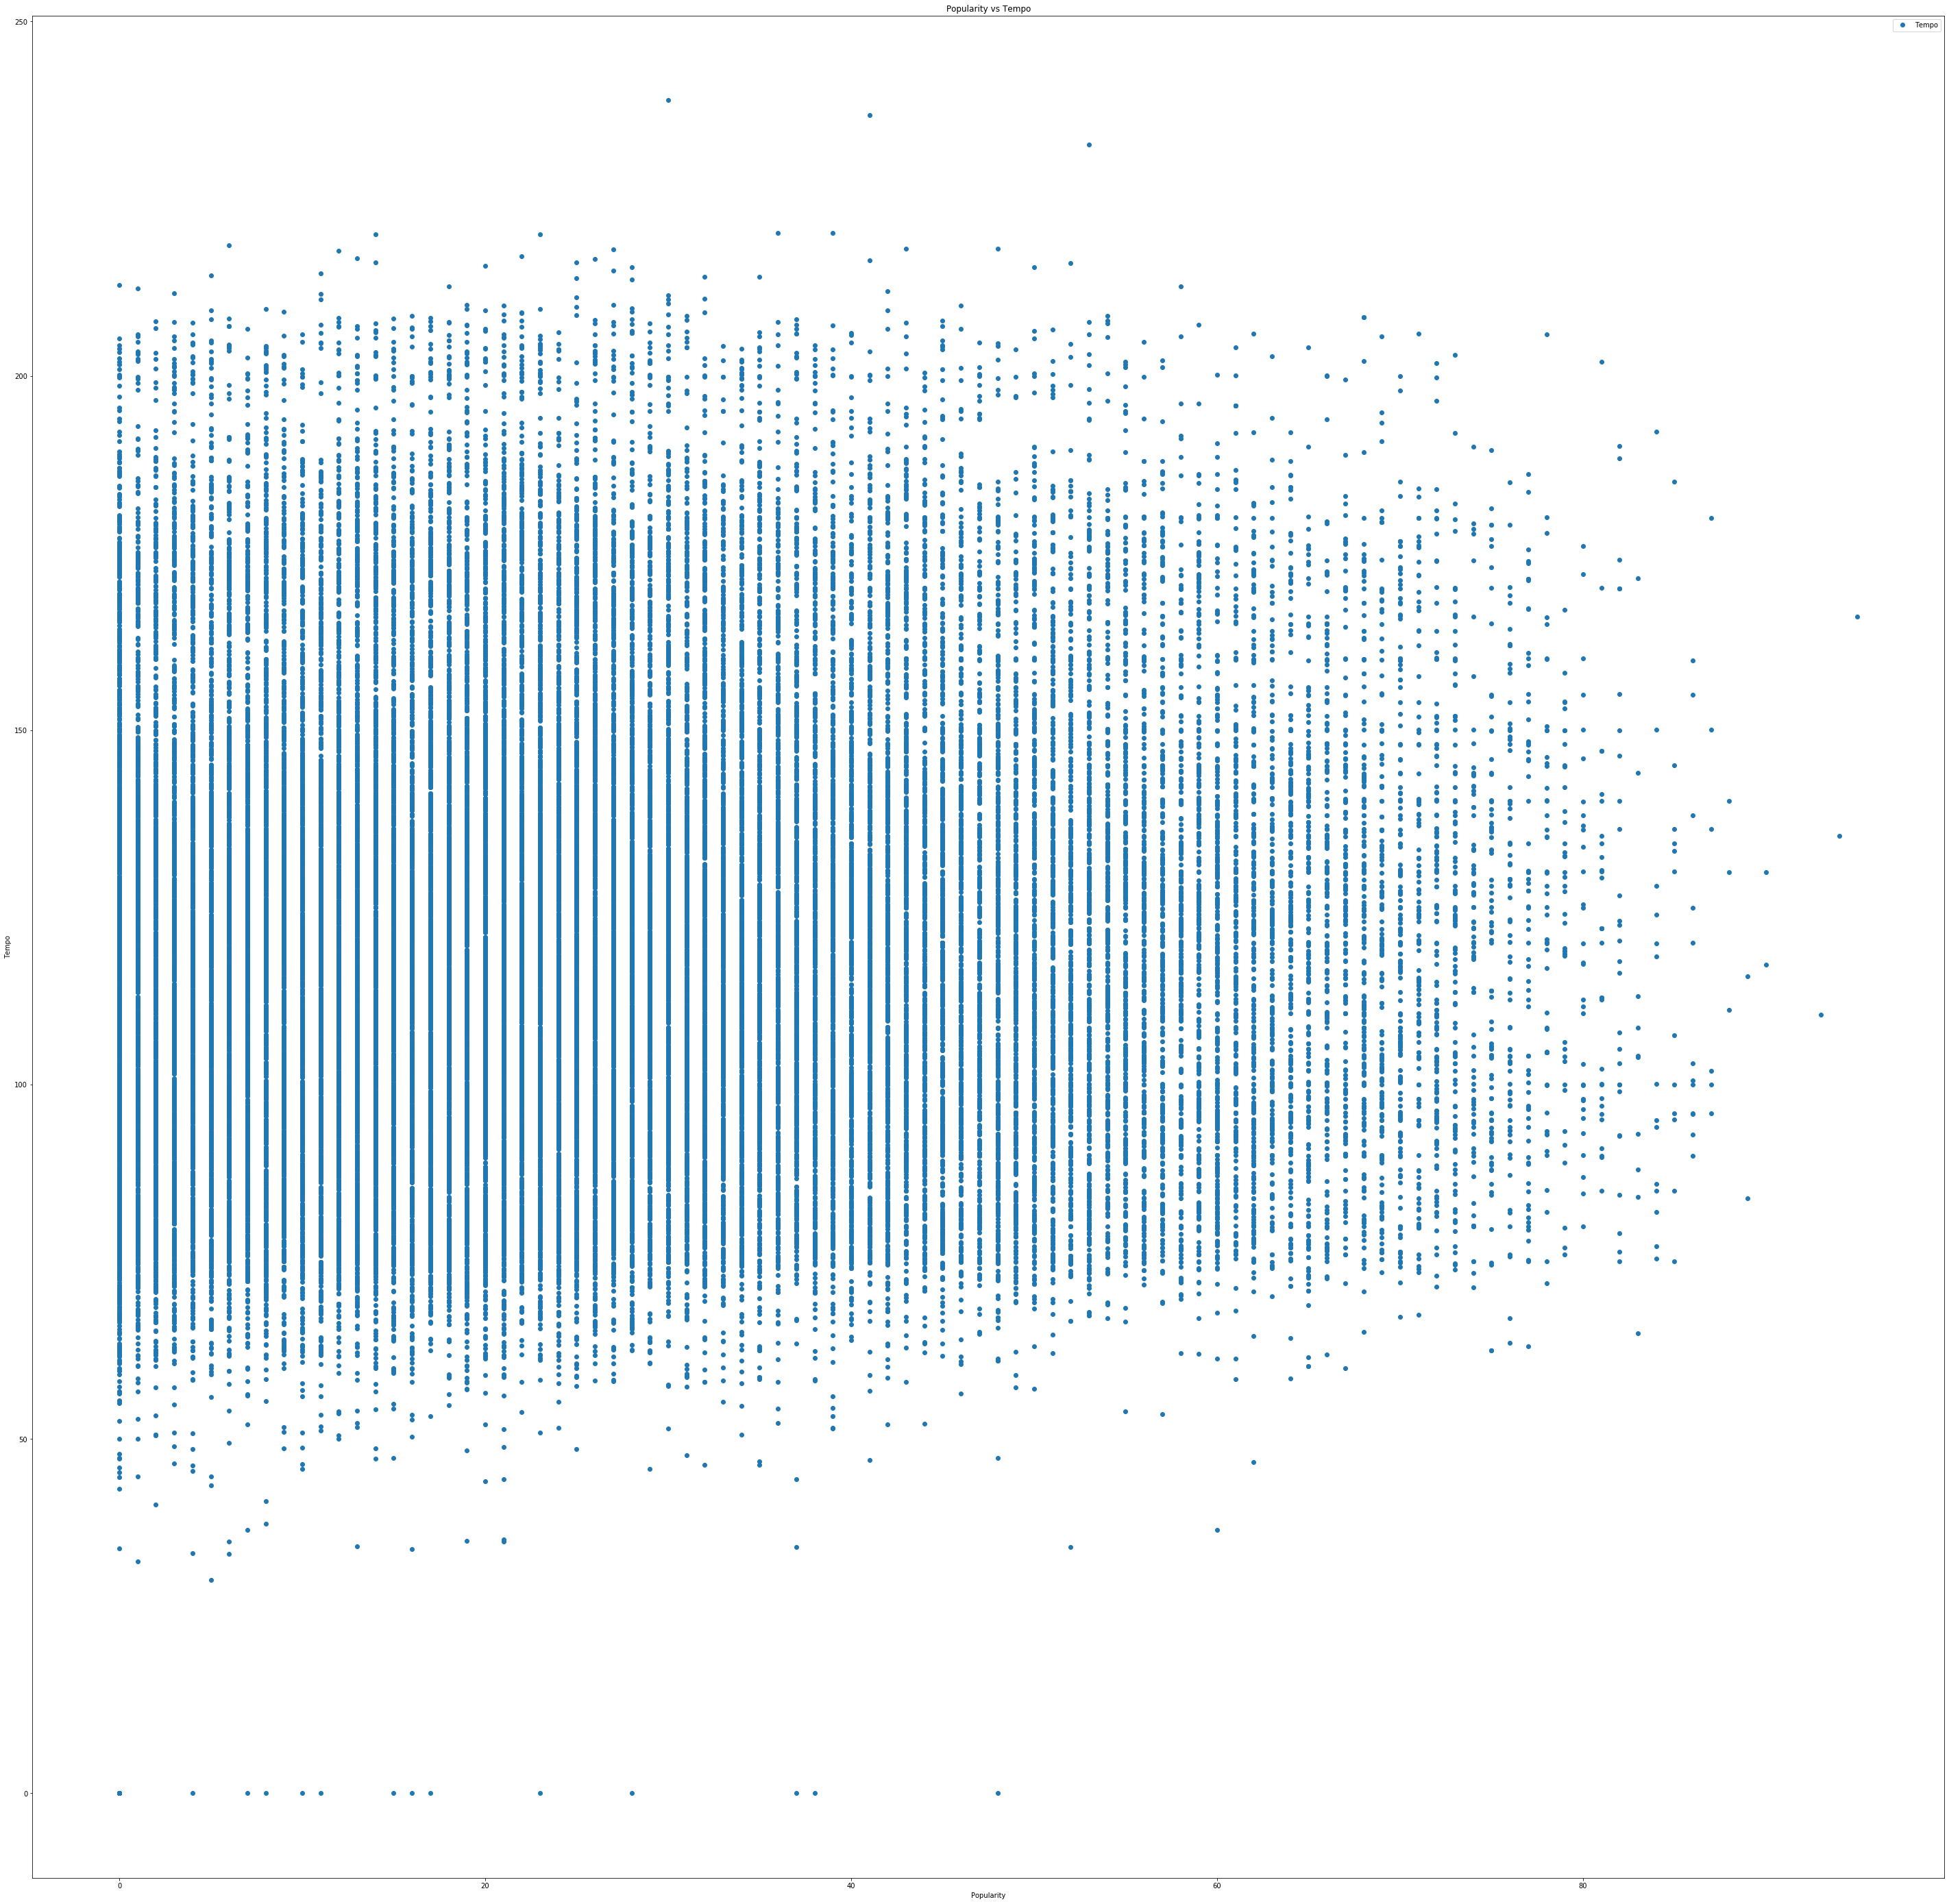

In [8]:
data.plot(x='Popularity', y='Tempo', style='o',figsize=(50,50))  
plt.title('Popularity vs Tempo')  
plt.xlabel('Popularity')  
plt.ylabel('Tempo')  
plt.show()

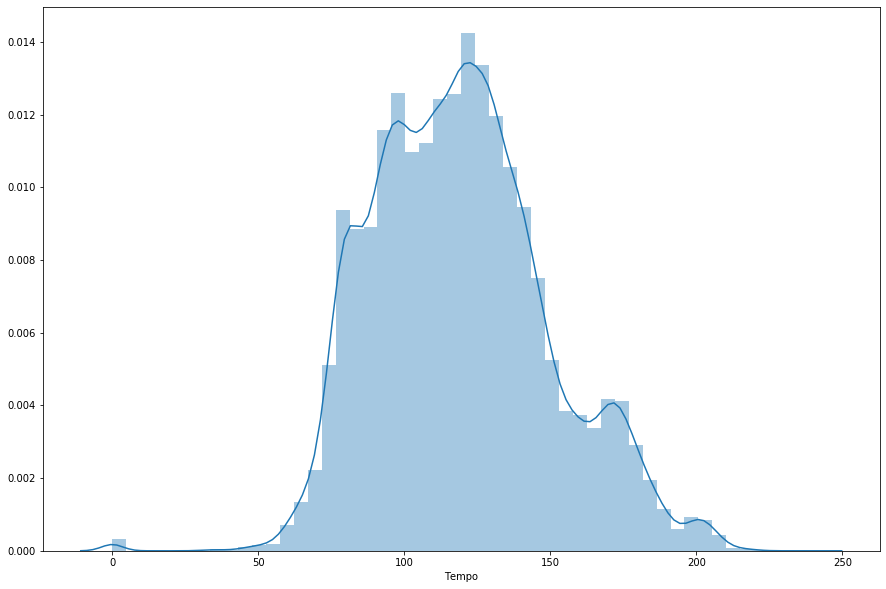

In [33]:
plt.figure(figsize=(15,10))
plt.tight_layout()
df4 = data.loc[data['Popularity']<50]
seabornInstance.distplot(df4['Tempo'])

In [34]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Release Date,Popularity,Danceability,Energy,Key Val,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
Release Date,1.000000,0.103879,0.061599,0.238364,0.019590,0.281013,-0.071993,0.107718,-0.251424,-0.004511,0.047575,-0.150728,0.039780,0.041083
Popularity,0.103879,1.000000,0.128969,0.188155,0.017711,0.254367,-0.037723,0.019629,-0.241023,-0.125064,-0.093561,-0.001977,0.055279,0.073658
Danceability,0.061599,0.128969,1.000000,0.109223,0.020462,0.137508,-0.037620,0.126564,-0.169025,-0.169604,-0.182748,0.537857,-0.083668,0.190941
Energy,0.238364,0.188155,0.109223,1.000000,0.031102,0.783370,-0.072778,0.113236,-0.732720,-0.089406,0.195434,0.294942,0.244582,0.193918
Key Val,0.019590,0.017711,0.020462,0.031102,1.000000,0.016093,-0.141655,0.026820,-0.030580,-0.005572,-0.004814,0.019748,0.000942,0.003033
Loudness,0.281013,0.254367,0.137508,0.783370,0.016093,1.000000,-0.040539,-0.001510,-0.577576,-0.224861,0.074583,0.188688,0.193768,0.168116
Mode,-0.071993,-0.037723,-0.037620,-0.072778,-0.141655,-0.040539,1.000000,-0.070894,0.079621,-0.049458,0.002233,0.032832,0.004728,-0.016991
Speechiness,0.107718,0.019629,0.126564,0.113236,0.026820,-0.001510,-0.070894,1.000000,-0.030448,-0.081231,0.185219,0.006461,0.013067,-0.009179
Acousticness,-0.251424,-0.241023,-0.169025,-0.732720,-0.030580,-0.577576,0.079621,-0.030448,1.000000,0.094214,-0.057764,-0.188428,-0.203425,-0.174538
Instrumentalness,-0.004511,-0.125064,-0.169604,-0.089406,-0.005572,-0.224861,-0.049458,-0.081231,0.094214,1.000000,-0.018476,-0.147866,-0.026981,-0.028515


In [36]:
reg = LinearRegression().fit(train_data,train_output)
reg_norm = LinearRegression().fit(train_data_norm,train_output)

In [37]:
# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
print(reg.score(test_data,test_output))
print(reg_norm.score(test_data_norm,test_output))

0.12253571842933975
0.10983735138821538


In [38]:
# Make predictions using the testing set
test_data_pred = reg.predict(test_data)

In [39]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test_output, test_data_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test_output, test_data_pred))

Coefficients: 
 [-1.12395783e-02  1.29666270e+01 -4.79310654e+00  3.60312264e-02
  7.89399332e-01 -4.53143518e-01  3.25758262e+00 -8.98506408e+00
 -4.84275040e+00 -7.72735265e+00 -9.73905048e+00  1.73817326e-02
  7.19697483e-01]
Mean squared error: 292.17
Coefficient of determination: 0.12


In [40]:
df_res = pd.DataFrame({'Actual': test_output.flatten(), 'Predicted': test_data_pred.flatten()})
df_res

,Actual,Predicted
0,35.0,37.067679
1,51.0,35.569085
2,26.0,27.515822
3,43.0,32.457792
4,8.0,33.099987
...,...,...
12204,18.0,30.524521
12205,8.0,24.109970
12206,61.0,37.251573
12207,12.0,24.679578


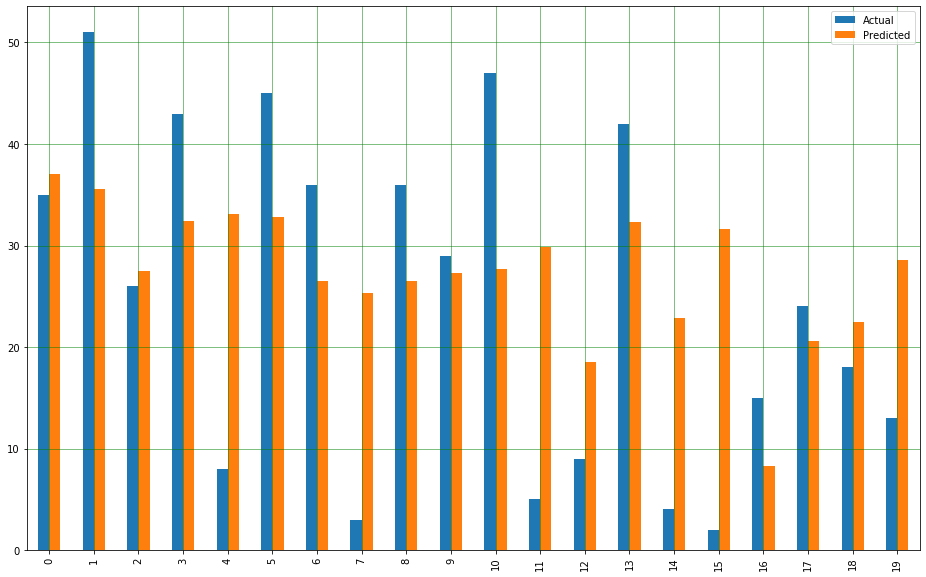

In [42]:
df1 = df_res.head(20)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [14]:
# Another penalization approach, called Lasso (least absolute shrinkage and selection operator), 
# can set some coefficients to zero. 
# Such methods are called sparse method and sparsity can be seen as an application of Occam’s razor: 
# prefer simpler models.

alphas = np.logspace(-4, -1, 6)
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha)
          .fit(train_data, train_output)
          .score(test_data, test_output) for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
y_pred = regr.fit(test_data, test_output)
print(regr.coef_)
print(best_alpha)
print('Mean Squared Error:', np.mean((regr.predict(test_data) - test_output)**2))  
print('Root Mean Squared Error:', np.sqrt(np.mean((regr.predict(test_data) - test_output)**2)))

[-5.82899296e-03  1.47373416e+01 -2.36740639e+00  7.65302743e-02
  6.81755064e-01 -7.19526965e-01  3.37394136e+00 -9.26788531e+00
 -5.30177700e+00 -7.60701483e+00 -1.17831857e+01  8.42460286e-03
  9.28524634e-01]
0.0001
Mean Squared Error: 291.6897298105284
Root Mean Squared Error: 17.07892648296515


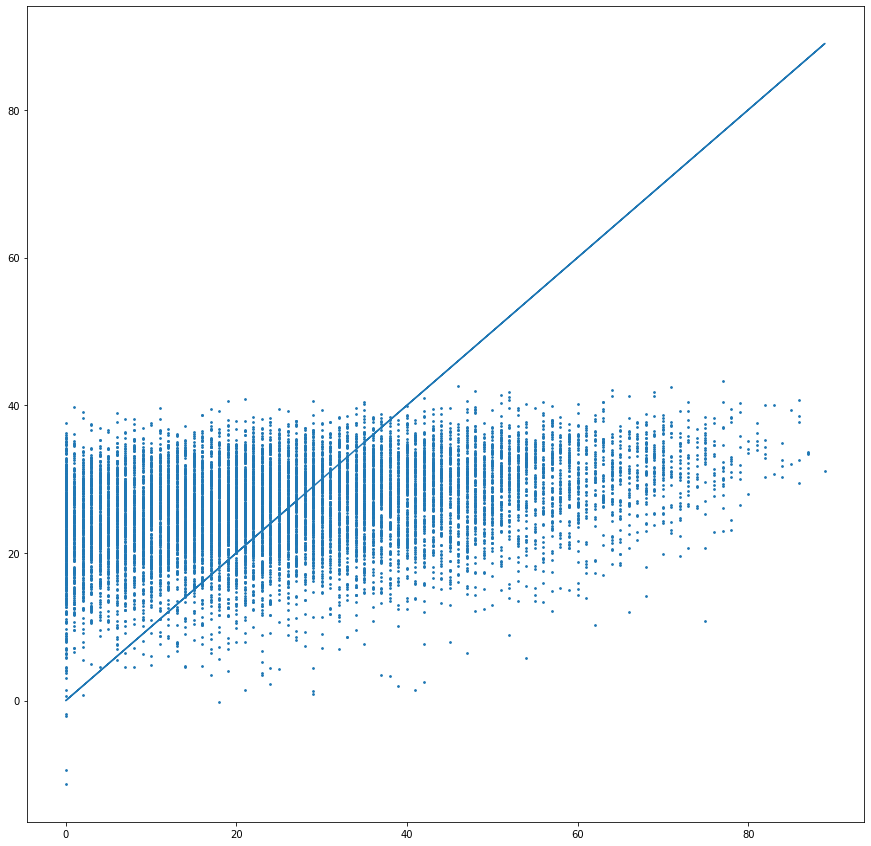

In [19]:
regr = linear_model.Ridge(alpha=.1)
regr.fit(train_data, train_output)
plt.figure(figsize=(15,15))
yy = regr.predict(test_data)
plt.plot(test_output, test_output) 
plt.scatter(test_output, yy, s=3) 